# Анализ данных с Pandas

In [ ]:
import pandas as pd
import numpy as np

## Структура

In [ ]:
q = pd.DataFrame(data={'a': ['abc', 'bcd', 'def'], 'b': [1,2,3], 'c': [100, 300, 200]}, index=[8,9,10])
q

,a,b,c
8,abc,1,100
9,bcd,2,300
10,def,3,200


In [ ]:
q.index

Index([8, 9, 10], dtype='int64')

In [ ]:
q.columns

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
q.a

,a
8,abc
9,bcd
10,def


In [ ]:
q['a']

,a
8,abc
9,bcd
10,def


In [ ]:
type(q.a)

pandas.core.series.Series

In [ ]:
q[:3]

,a,b,c
8,abc,1,100
9,bcd,2,300
10,def,3,200


In [ ]:
q[['a', 'b']]

,a,b
8,abc,1
9,bcd,2
10,def,3


In [ ]:
q[['a', 'b']][:2]

,a,b
8,abc,1
9,bcd,2


## Чтение и просмотр

Данные соцопросов Census Income, с которыми будем работать:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/adult_data.csv')

* __age__: continuous.
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt__: continuous.
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__: continuous.
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex__: Female, Male.
* __capital-gain__: continuous.
* __capital-loss__: continuous.
* __hours-per-week__: continuous.
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

`head()` показывает первые 5 строк датафрейма.

`tail()` - последние 5.

`head(N)` показывает первые N строк датафрейма.

`tail(N)` - последние N.

In [ ]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Общее

Размер:

In [ ]:
df.shape

(32561, 15)

Столбцы:

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

Информация содержит данные о типе колонок, степени их заполненности (в нашем случае пропусков в данных нет), типе данных каждой из колонок, а также потреблении памяти:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Метод `describe` содержит основные статистики по числовым столбцам данных:
* количество
* среднее
* среднеквадратичное отклонение
* минимум, максимум
* медиану
* первый и третий квартили

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Если хочется посмотреть и на нечисловые признаки, то нужно указать их тип в параметре `include`. Всего есть совсем немного основных:
* `bool` - логический
* `object` - общий нечисловой, в большинстве случаев это строки
* `numeric` - числовой, включающий как числа с плавающей запятой, так и целые

In [ ]:
df.describe(include=['object', 'bool'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Полезным методом является `value_counts()`, считающим распределение данных по категориям:

In [ ]:
df.education.value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


Для отображения в долях существует флажок `normalize`:

In [ ]:
df.education.value_counts(normalize=True)

,proportion
education,
HS-grad,0.322502
Some-college,0.223918
Bachelors,0.164461
Masters,0.052916
Assoc-voc,0.042443
11th,0.036086
Assoc-acdm,0.032769
10th,0.028654
7th-8th,0.019840


Можно строить простые диаграммы

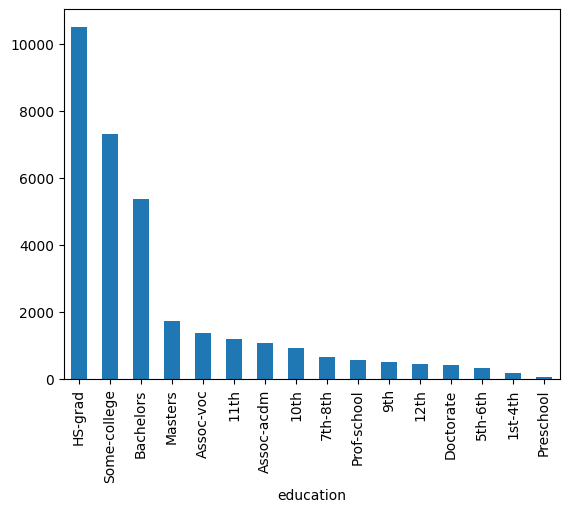

In [ ]:
df.education.value_counts().plot.bar(); #(kind='bar');

## Индексация и фильтры

Весь датафрейм:

In [ ]:
print(df)

       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

Только те, чей возраст меньше 25 лет, но больший 10:

In [ ]:
df[(df.age < 25) & (df.age > 10)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,20,Private,270436,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32527,22,Private,203715,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
32535,22,Private,325033,12th,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,35,United-States,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


Только те, кто получают больше 50 000$:

In [ ]:
df[df.salary == '>50K']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
df[df.salary == '<=50K'].sex.value_counts(normalize=False)

,count
sex,
Male,15128
Female,9592


In [ ]:
df[df.salary == '>50K'].sex.value_counts(normalize=True)

,proportion
sex,
Male,0.849637
Female,0.150363


## Сортировка

In [ ]:
df.sort_values(by=['education'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5843,18,Private,50879,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,6,United-States,<=50K
20930,18,?,184416,10th,6,Never-married,?,Own-child,Black,Male,0,0,30,United-States,<=50K
27263,28,Private,66434,10th,6,Never-married,Other-service,Unmarried,White,Female,0,0,15,United-States,<=50K
31772,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
30608,41,Private,202872,10th,6,Married-spouse-absent,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25866,55,Self-emp-inc,182273,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
7509,22,Private,102684,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0,0,32,United-States,<=50K
7507,29,Self-emp-not-inc,337505,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,South,<=50K
14395,42,Local-gov,201723,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


Отсортируем сначала по полу, внутри пола - по возрасту, но в обратном порядке

In [ ]:
df.sort_values(by=['sex', 'age'], ascending=[True, False])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K
4109,90,?,256514,Bachelors,13,Widowed,?,Other-relative,White,Female,991,0,10,United-States,<=50K
5272,90,Private,141758,9th,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
8963,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30927,17,Private,108470,11th,7,Never-married,Other-service,Own-child,Black,Male,0,0,17,United-States,<=50K
31131,17,Private,277541,11th,7,Never-married,Sales,Own-child,White,Male,0,0,5,United-States,<=50K
31439,17,Private,375657,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States,<=50K
32282,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


## Применение функций

Применить функцию к каждому столбцу или каждой строке можно с помощью `apply`:

In [ ]:
t = pd.DataFrame(data = {'a': [1,2,3], 'b': [4,5,6]})
t

,a,b
0,1,4
1,2,5
2,3,6


In [ ]:
t['c'] = t.apply(lambda row: row['a'] + row['b'], axis=1) # построчно

In [ ]:
t

,a,b,c
0,1,4,5
1,2,5,7
2,3,6,9


# Применение функции к каждой __ячейке__ реализовывается с помощью `map`:

In [ ]:
renaming = {'>50K': 1, '<=50K': 0}
df.salary = df.salary.map(renaming)

In [ ]:
df.salary.value_counts()

,count
salary,
0,24720
1,7841


In [ ]:
renaming = {1:'> 50K', 0: '<= 50K'}
df.salary = df.salary.map(renaming)

,count
salary,


__apply__ к нескольким столбцам сразу называется __applymap__:

In [ ]:
df['sex'] = df['sex'].apply(lambda x: x.lower())
df['relationship'] = df['relationship'].apply(lambda x: x.lower())

In [ ]:
# same as above:
cols = ['sex', 'relationship']
df[cols] = df[cols].applymap(lambda x: x.lower())

<ipython-input-19-5139c014da13>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(lambda x: x.lower())


У строковых столбцов есть хитрое поле __str__, которое возвращает наружу как будто строку (синтаксис тот же), но применяет к каждому элементу столбца.

При больших объемах данных это будет быстрее, потому что `.str` под капотом векторизует операции со строками. Для дат можно использовать `.dt`.

In [ ]:
df.sex.apply(lambda x: x.upper());

In [ ]:
# same as above
df.sex.str.upper();

## Дубликаты

In [ ]:
q = pd.DataFrame(data={'a': [1,2,3,1,1], 'b': [1,2,3,2,1], 'c':[10,20,30,40,40]})
q

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30
3,1,2,40
4,1,1,40


In [ ]:
q.duplicated(['a'])

,0
0,False
1,False
2,False
3,True
4,True


In [ ]:
q.duplicated(['a', 'b']) # - уже оценивает кортежи значений из нескольких колонок

,0
0,False
1,False
2,False
3,False
4,True


In [ ]:
q.drop_duplicates(subset=['a'])

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30


In [ ]:
q.drop_duplicates(subset=['a', 'b'])

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30
3,1,2,40


**Текст, выделенный полужирным шрифтом**## Группировка

In [ ]:
df.groupby(['salary']);

__Важно__: groupby-объекты - не копии частей датафрейма!

In [ ]:
df.groupby(['salary']).describe(include=['object', 'bool'])

workclass                        education                          \
           count unique      top   freq     count unique        top  freq   
salary                                                                      
<=50K      24720      9  Private  17733     24720     16    HS-grad  8826   
>50K        7841      7  Private   4963      7841     15  Bachelors  2221   

       marital-status         ...   race           sex                      \
                count unique  ...    top   freq  count unique   top   freq   
salary                        ...                                            
<=50K           24720      7  ...  White  20699  24720      2  Male  15128   
>50K             7841      7  ...  White   7117   7841      2  Male   6662   

       native-country                               
                count unique            top   freq  
salary                                              
<=50K           24720     42  United-States  21999  
>50K             7841     40  United-States   7171  

[2 rows x 32 columns]

In [ ]:
df.groupby('salary')

In [ ]:
df.sex.value_counts()

,count
sex,
Male,21790
Female,10771


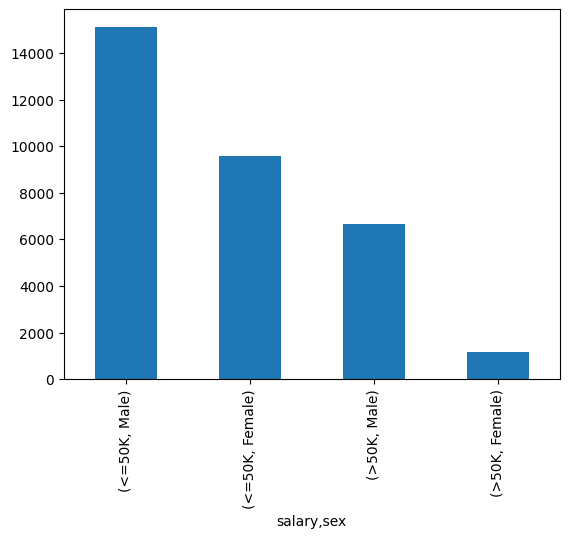

In [ ]:
df.groupby('salary').sex.value_counts().plot.bar();

## Таблицы сопряженности и melt

### Таблицы сопряженности

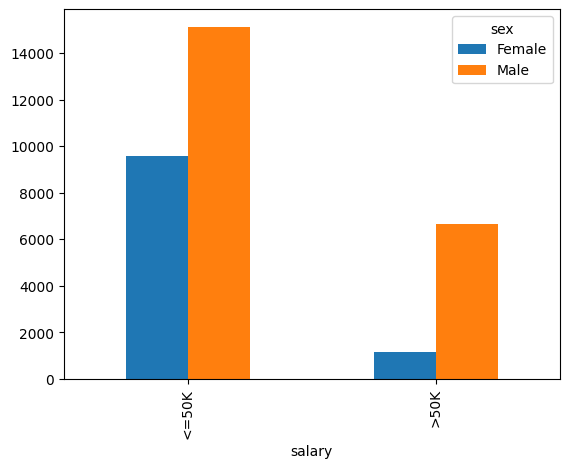

In [ ]:
pd.crosstab(df.salary, df.sex).plot(kind='bar');

In [ ]:
pd.crosstab(df.salary, df.sex, normalize=True)

sex,Female,Male
salary,,
<=50K,0.294586,0.464605
>50K,0.036209,0.204601


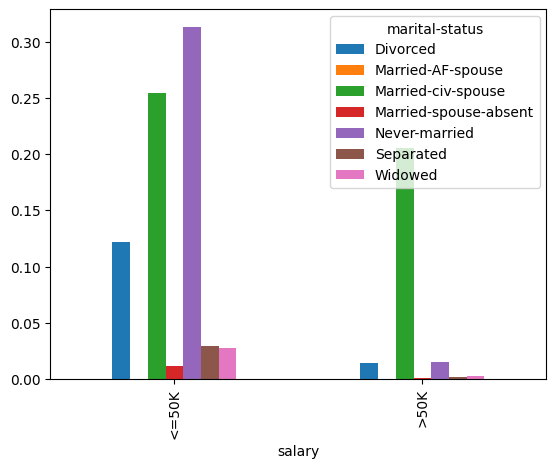

In [ ]:
pd.crosstab(df.salary, df['marital-status'], normalize=True).plot.bar();

### Melt - превращение столбцов в строки

In [ ]:
t = pd.DataFrame(data={'name': ['PC', 'PlayStation4'],
                   '1W-2014': [100, 300],
                   '2W-2014': [150, 350]})
t

,name,1W-2014,2W-2014
0,PC,100,150
1,PlayStation4,300,350


In [ ]:
t2 = pd.melt(t, id_vars=['name'], value_name='cost', var_name='timestamp')
t2

,name,timestamp,cost
0,PC,1W-2014,100
1,PlayStation4,1W-2014,300
2,PC,2W-2014,150
3,PlayStation4,2W-2014,350


## Изменение таблиц

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


### Добавление нового столбца

In [ ]:
df['working_days'] = df['hours-per-week'] / 8.0

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,5.000
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1.625


In [ ]:
df['constant'] = 1

In [ ]:
df = df.assign(anotherConstant = lambda dataframe: dataframe.constant*2)

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days,constant,anotherConstant
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,5.000,1,2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1.625,1,2


### Удаление строк и столбцов

In [ ]:
df.drop(['constant', 'anotherConstant'], axis=1, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,5.000
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1.625
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,5.000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,5.000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,5.000


__NB__: У большинства операторов pandas есть флажок `inplace`. Если он выставлен в `False` (по умолчанию именно так), то изменения, например, как `drop` в примере выше, не будут изменять таблицу, а вернут измененную копию.

In [ ]:
df.drop([1,2]).head(3) # => удаляет строки

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,5.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,5.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,5.0


### loc, iloc

In [ ]:
df.loc[0, 'workclass'] # получение конкретной ячейки по индексу и названию столбца

'State-gov'

In [ ]:
df.iloc[0, 1] # получение конкретной ячейки по номеру строки и номеру столбца, вне зависимости от индексов

'State-gov'

__Важно__: можно и получать строки по маскам:

In [ ]:
df.loc[df.age % 5 == 0, 'workclass'].head()

,workclass
1,Self-emp-not-inc
11,State-gov
14,Private
16,Self-emp-not-inc
20,Private


__Важно__: Основываясь на этом, можно присваивать другим значениям:

In [ ]:
df.loc[df.age % 2 == 0, 'workclass'] = 'ЧЕТНЫЙ'

In [ ]:
df.loc[:5, 'education'] = 'NO EDUCATION'

In [ ]:
df.head(7)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,NO EDUCATION,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,5.000
1,50,ЧЕТНЫЙ,83311,NO EDUCATION,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1.625
2,38,ЧЕТНЫЙ,215646,NO EDUCATION,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,5.000
3,53,Private,234721,NO EDUCATION,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,5.000
4,28,ЧЕТНЫЙ,338409,NO EDUCATION,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,5.000
5,37,Private,284582,NO EDUCATION,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,5.000
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,2.000


### Переименование столбцов

In [ ]:
df.columns = [c.upper() for c in df.columns]

In [ ]:
df.head(1)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [ ]:
df.columns = [c.lower() for c in df.columns]

In [ ]:
df = df.rename(columns={'marital-status': 'marital_status'})
                        # словарь старое-новое значение
df.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Работа с пропущенными (NaN) значениями

In [ ]:
test = pd.DataFrame(data={'name': ['John', 'Bill', 'Jennifer', 'Max'],
                          'salary': [90, np.nan, 95, 130],
                          'age': [27, 30, np.nan, np.nan],
                          'status': [np.nan, 'married', np.nan, 'married']
                         })
test = test[['name', 'age', 'salary', 'status']]
test

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


### Отображение

In [ ]:
test[test['age'].isnull()]

,name,age,salary,status
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [ ]:
test[test['age'].notnull()]

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married


In [ ]:
test[test.isnull().any(axis=1)] # !

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [ ]:
test[~test.isnull().any(axis=1)]

,name,age,salary,status


### Заполнение

Прежде всего, можно заполнить некоторым константным значением:

In [ ]:
dashtest = test.fillna('-')
dashtest

,name,age,salary,status
0,John,27.0,90.0,-
1,Bill,30.0,-,married
2,Jennifer,-,95.0,-
3,Max,-,130.0,married


Важно заметить, что теперь слобцы возраста и зарплаты более не числовые:

In [ ]:
print(test.dtypes, '\n\n', dashtest.dtypes)

name       object
age       float64
salary    float64
status     object
dtype: object 

 name      object
age       object
salary    object
status    object
dtype: object


In [ ]:
test.fillna(method='ffill')

<ipython-input-10-794716843cd8>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method='ffill')


,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,90.0,married
2,Jennifer,30.0,95.0,married
3,Max,30.0,130.0,married


In [ ]:
test.fillna(method='bfill')

<ipython-input-11-8dd5aea22d5e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method='bfill')


,name,age,salary,status
0,John,27.0,90.0,married
1,Bill,30.0,95.0,married
2,Jennifer,NaN,95.0,married
3,Max,NaN,130.0,married


In [ ]:
test.fillna(method='ffill').fillna(method='bfill')

<ipython-input-12-1e8e582cb5e8>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method='ffill').fillna(method='bfill')


,name,age,salary,status
0,John,27.0,90.0,married
1,Bill,30.0,90.0,married
2,Jennifer,30.0,95.0,married
3,Max,30.0,130.0,married


In [ ]:
test['salary'] = test[['salary']].fillna(test.salary.median())
test

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,95.0,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [ ]:
test['age'] = test[['salary']].fillna(25)
test['status'] = test[['status']].fillna(test.status.mode()[0])
test

,name,age,salary,status
0,John,90.0,90.0,married
1,Bill,95.0,95.0,married
2,Jennifer,95.0,95.0,married
3,Max,130.0,130.0,married


## Краткий конспект

- df.shape - размер
- df.head(N), df.tail(N), - просмотр
- df[массив имен колонок] - часть (slice) датафрейма
- df['имя колонки'] - одна колонка (можно и через точку: df.имя_колонки)
- df.unique, df.nunique - просмотр уникальных значений и их количества
- df.value_counts - сколько разных значений в колонке
- df.имя колонки.apply - применяет функцию к значениям в столбце
- df.fillna - заполняет NaN
- df.dropna - удаляет строки/столбцы с NaN
- df.duplicated - показывает строки, являющиеся дупликатами других
- df.drop_duplicates - удаляет строки-дупликаты
- df[df.isnull().any(axis=1)] - вывести строки, содержащие NaN
- df[df.имя колонки.isnull().any(axis=1)] - вывести только те строки, где в указанной колонке есть пропуски
- df.groupby - группировка по некоторому признаку

## Задание

**1.** Загрузите csv-файл `https://raw.githubusercontent.com/yakushinav/omo/main/data/fishing.csv` в переменную fishing_data. Описание данных см. [здесь](https://github.com/yakushinav/journ/blob/main/fishing.md).

mode - recreation mode choice, on of : beach, pier, boat and charter

price - price for chosen alternative

catch - catch rate for chosen alternative

pbeach- price for beach mode

ppier- price for pier mode

pboat- price for private boat mode

pcharter - price for charter boat mode

cbeach - catch rate for beach mode

cpier - catch rate for pier mode

cboat- catch rate for private boat mode

ccharter - catch rate for charter boat mode

income - monthly income

In [ ]:
### YOUR CODE HERE ###

import pandas as pd
import numpy as np
import math

fishing_data=pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/fishing.csv')
fishing_data.head(20)

,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320
5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320
6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010
7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332
8,9,boat,34.914,0.0233,34.914,34.914,34.914,53.414,0.2537,0.1498,0.0233,0.0219,3749.9999
9,10,boat,28.314,0.0233,28.314,28.314,28.314,46.814,0.2537,0.1498,0.0233,0.0219,2916.6666


**2.** Выведите описательные статистики для всех числовых (integer, float) переменных в датафрейме.

In [ ]:
### YOUR CODE HERE ###
fishing_data.describe(include = [int,float])

,Unnamed: 0,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,591.500000,52.081975,0.389368,103.422005,103.422005,55.256570,84.379244,0.241011,0.162224,0.171215,0.629368,4099.337054
std,341.358316,53.829970,0.560596,103.641042,103.641042,62.713444,63.544650,0.190752,0.160390,0.209789,0.706114,2461.964060
min,1.000000,1.290000,0.000200,1.290000,1.290000,2.290000,27.290000,0.067800,0.001400,0.000200,0.002100,416.666680
25%,296.250000,15.870000,0.036100,26.656500,26.656500,13.122000,42.896000,0.067800,0.050300,0.023300,0.021900,2083.333200
50%,591.500000,37.896000,0.164300,74.628000,74.628000,33.534000,61.607000,0.253700,0.078900,0.089700,0.421600,3749.999900
75%,886.750000,67.513000,0.533300,144.144000,144.144000,72.402000,102.774000,0.533300,0.149800,0.241300,1.026600,5416.666700
max,1182.000000,666.110000,2.310100,843.186000,843.186000,666.110000,691.110000,0.533300,0.452200,0.736900,2.310100,12499.998000


**3.** Выберите из таблицы только строки, которые соответствуют респондентам, которые выбрали рыбалку на берегу (`beach`).

In [ ]:
### YOUR CODE HERE ###

fishing_data[fishing_data ['mode'] == 'beach']

,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.00100
14,15,beach,74.514,0.2537,74.514,74.514,74.514,93.014,0.2537,0.1498,0.2339,0.6288,8750.00100
16,17,beach,48.114,0.1049,48.114,48.114,33.534,57.534,0.1049,0.0451,0.1574,0.4671,5416.66670
25,26,beach,67.784,0.5333,67.784,67.784,17.862,52.862,0.5333,0.4522,0.2413,1.0266,1249.99980
33,34,beach,9.522,0.0678,9.522,9.522,78.292,107.292,0.0678,0.0789,0.0014,0.0029,3749.99990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,1168,beach,23.688,0.5333,23.688,23.688,139.496,174.496,0.5333,0.4522,0.0156,0.0058,2083.33320
1173,1174,beach,62.634,0.0678,62.634,62.634,123.552,152.552,0.0678,0.0789,0.0014,0.0029,2916.66660
1176,1177,beach,121.836,0.5333,121.836,121.836,203.346,238.346,0.5333,0.4522,0.2413,1.0266,2916.66660
1178,1179,beach,235.436,0.5333,235.436,235.436,392.946,427.946,0.5333,0.4522,0.2413,1.0266,6250.00130


**4.** Выберите из таблицы строки, которые соответствуют респондентам, которые предпочитают рыбачить на лодке (`boat`) с доходом (`income`) ниже 3500. Сохраните результат в переменную `boat_data`.

In [ ]:
### YOUR CODE HERE ###
boat_data = fishing_data[(fishing_data['mode'] == 'boat')& (fishing_data.income < 3500)]
boat_data.head ()

,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
9,10,boat,28.314,0.0233,28.314,28.314,28.314,46.814,0.2537,0.1498,0.0233,0.0219,2916.6666
22,23,boat,15.134,0.1665,100.674,100.674,15.134,50.134,0.5333,0.4522,0.1665,0.3975,2083.3332
32,33,boat,7.722,0.0023,33.462,33.462,7.722,31.722,0.1049,0.0451,0.0023,0.0046,2916.6666
37,38,boat,80.608,0.0531,25.648,25.648,80.608,105.608,0.2537,0.1498,0.0531,0.0052,1249.9998
40,41,boat,46.332,0.1643,10.296,10.296,46.332,75.332,0.0678,0.0789,0.1643,0.5391,2916.6666


**5.** Переименуйте столбец `catch` в `c_rate`.

In [ ]:
### YOUR CODE HERE ###
fishing_data = fishing_data.rename(columns={'catch': 'c_rate'})
fishing_data.head()

,Unnamed: 0,mode,price,c_rate,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320


**6.** Добавьте в таблицу столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [ ]:
### YOUR CODE HERE ###
fishing_data['log_income'] = np.log (fishing_data['income'])

In [ ]:
fishing_data.head()

,Unnamed: 0,mode,price,c_rate,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182


**7.** Сгруппируйте наблюдения в таблице по признаку тип рыбалки (`mode`) и выведите для каждого типа среднюю цену (`price`), которую респонденты готовы заплатить за рыбалку.

In [ ]:
### YOUR CODE HERE ###
fishing_data.groupby(['mode']).price.mean()

,price
mode,
beach,35.699493
boat,41.606813
charter,75.096942
pier,30.571326


**8.** Выведите на экран первые 8 строк таблицы. А теперь последние 8.

In [ ]:
### YOUR CODE HERE ###
fishing_data.head (8)

,Unnamed: 0,mode,price,c_rate,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182
5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320,8.430182
6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010,9.076809
7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332,7.641724


In [ ]:
fishing_data.tail (8)

,Unnamed: 0,mode,price,c_rate,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
1174,1175,boat,86.802,0.0102,91.834,91.834,86.802,121.802,0.0678,0.0789,0.0102,0.0209,4583.33200,8.430182
1175,1176,charter,149.402,0.0209,121.034,121.034,114.402,149.402,0.0678,0.0789,0.0102,0.0209,6250.00130,8.740337
1176,1177,beach,121.836,0.5333,121.836,121.836,203.346,238.346,0.5333,0.4522,0.2413,1.0266,2916.66660,7.978197
1177,1178,pier,150.236,0.4522,150.236,150.236,250.746,285.746,0.5333,0.4522,0.2413,1.0266,3749.99990,8.229511
1178,1179,beach,235.436,0.5333,235.436,235.436,392.946,427.946,0.5333,0.4522,0.2413,1.0266,6250.00130,8.740337
1179,1180,pier,65.036,0.4522,65.036,65.036,108.546,143.546,0.5333,0.4522,0.2413,1.0266,1249.99980,7.130899
1180,1181,beach,36.636,0.5333,36.636,36.636,61.146,96.146,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287
1181,1182,boat,235.436,0.6817,339.890,339.890,235.436,260.436,0.2537,0.1498,0.6817,2.3014,6250.00130,8.740337


**9.** Сохраните изменённый датафрейм в csv-файл.

In [45]:
### YOUR CODE HERE ###
NEW_ONE = fishing_data.to_csv ('NEW_ONE.csv')